# Handwritten Digits Recognition Problem

##### In this project, we propose two image processing models to recognize the value of a set of handwritten digits between 0 and 9. In a first step, we apply a Deep Learning based model, using the neural networks under tensorflow and keras, then, we solve the problem by using KNN classifier and we compare the two methods in terms of speed and quality, the quality is evaluated by three metrics : Recall, Precision and F1-score.

Here is the description of the database :
http://yann.lecun.com/exdb/mnist/

In [1]:
import numpy as np
import pandas as pd
import sklearn
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn import metrics
import datetime

In [2]:
mnist = tf.keras.datasets.mnist
(a_train, b_train), (a_test, b_test) = mnist.load_data()

In [3]:
print(a_train[-1])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  38  48
   48  22   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  62  97 198 243 254
  254 212  27   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  67 172 254 25

In [4]:
# Data dimensions

a_train.shape, b_train.shape, a_test.shape, b_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

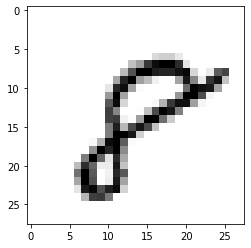

In [5]:
plt.imshow(a_train[-1], cmap=plt.cm.binary)
plt.show()

In [6]:
# Here we build our neural network model
t_nn0 = datetime.datetime.now()

TF = tf.keras.models.Sequential()
# It's mendatory to flatten the inputs and change their dimension to (60000,28*28) instead of (60000,28,28)
TF.add(tf.keras.layers.Flatten(input_shape=(28,28))) 
TF.add(tf.keras.layers.Dense(64, activation=tf.nn.relu))
TF.add(tf.keras.layers.Dense(64, activation=tf.nn.relu))
# With two hidden layers we get good results
# However we add a third one as it makes the results slightly better
TF.add(tf.keras.layers.Dense(64, activation=tf.nn.relu)) 
TF.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
TF.compile(optimizer='RMSprop',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

TF.fit(a_train, b_train, epochs=4)
b_pred = TF.predict(a_test)

t_nn1 = datetime.datetime.now()
t_nn1 - t_nn0

Train on 60000 samples
Epoch 1/4
60000/60000 [==============================] - 7s 124us/sample - loss: 1.0694 - accuracy: 0.8553
Epoch 2/4
60000/60000 [==============================] - 4s 69us/sample - loss: 0.2942 - accuracy: 0.9333
Epoch 3/4
60000/60000 [==============================] - 4s 60us/sample - loss: 0.2517 - accuracy: 0.9454
Epoch 4/4
60000/60000 [==============================] - 4s 60us/sample - loss: 0.2351 - accuracy: 0.9523


datetime.timedelta(seconds=19, microseconds=428814)

7 1.0


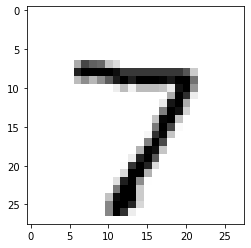

2 1.0


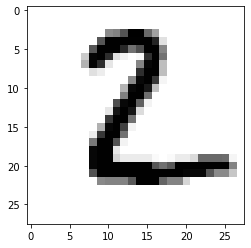

1 1.0


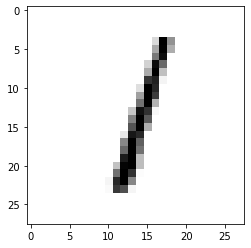

0 0.9998454


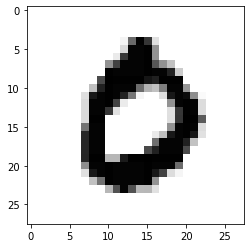

4 0.99979705


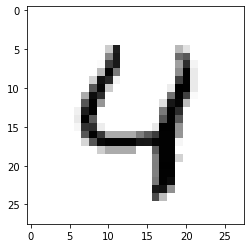

1 0.999895


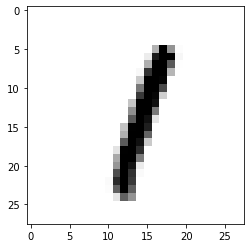

4 0.9999949


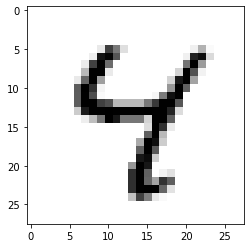

9 0.99862874


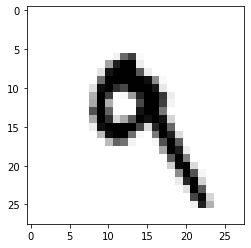

In [7]:
for i in range(8):
    print(np.argmax(b_pred[i]), b_pred[i][np.argmax(b_pred[i])])
    plt.imshow(a_test[i], cmap=plt.cm.binary)
    plt.show()

In [8]:
pred_nn = []

for i in range(len(b_pred)):
    pred_nn.append(np.argmax(b_pred[i]))

Here, we evaluate the quality of the Neural Network model by using "sklearn.metrics.precision_recall_fscore_support"

In [9]:
score_nn = sklearn.metrics.precision_recall_fscore_support(b_test, pred_nn)

print(score_nn)

(array([0.95630586, 0.98843416, 0.96307094, 0.95893452, 0.94637537,
       0.81877934, 0.94506612, 0.97076613, 0.96308725, 0.93887776]), array([0.98265306, 0.97885463, 0.96027132, 0.85544554, 0.97046843,
       0.97757848, 0.9697286 , 0.93677043, 0.88398357, 0.92864222]), array([0.96930045, 0.98362107, 0.96166909, 0.90423862, 0.95827049,
       0.89115994, 0.95723854, 0.95346535, 0.92184154, 0.93373194]), array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009],
      dtype=int64))


The theoritical background of the classification metrics used in this work is exposed in this page :

https://medium.com/swlh/recall-precision-f1-roc-auc-and-everything-542aedf322b9

In the following, we calculate for each digit the number of positive, negative, real and predicted values.

Positive and Negative ??

For 0 : positive is 0 and negative is not 0

For 1 : positive is 1 and negative is not 1

and so ...

In [10]:
S_nn = np.asarray(score_nn)
S_nn = pd.DataFrame(S_nn.T)
S_nn.columns = ['Precision','Recall','F1_score','Sum_P']

S_nn['Sum_N'] = sum(S_nn.Sum_P) - S_nn.Sum_P
S_nn['Sum_Pred_P'] = np.unique(pred_nn, return_counts=True)[1]
S_nn['Sum_Pred_N'] = sum(S_nn.Sum_Pred_P) - S_nn.Sum_Pred_P

S_nn

,Precision,Recall,F1_score,Sum_P,Sum_N,Sum_Pred_P,Sum_Pred_N
0,0.956306,0.982653,0.969300,980.0,9020.0,1007,8993
1,0.988434,0.978855,0.983621,1135.0,8865.0,1124,8876
2,0.963071,0.960271,0.961669,1032.0,8968.0,1029,8971
3,0.958935,0.855446,0.904239,1010.0,8990.0,901,9099
4,0.946375,0.970468,0.958270,982.0,9018.0,1007,8993
5,0.818779,0.977578,0.891160,892.0,9108.0,1065,8935
6,0.945066,0.969729,0.957239,958.0,9042.0,983,9017
7,0.970766,0.936770,0.953465,1028.0,8972.0,992,9008
8,0.963087,0.883984,0.921842,974.0,9026.0,894,9106
9,0.938878,0.928642,0.933732,1009.0,8991.0,998,9002


In [11]:
Real_Predicted = pd.DataFrame({'Real_values':b_test,
                               'Predicted_values':pred_nn})

In [12]:
Real_Predicted[:10]

,Real_values,Predicted_values
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,5
9,9,9


In [13]:
TP = []
TN = []
FP = []
FN = []

for i in range(10):
    TP.append(len(Real_Predicted[(Real_Predicted['Real_values']==i)&(Real_Predicted['Predicted_values']==i)])) #TP)
    TN.append(len(Real_Predicted[(Real_Predicted['Real_values']!=i)&(Real_Predicted['Predicted_values']!=i)])) #TN)
    FP.append(len(Real_Predicted[(Real_Predicted['Real_values']!=i)&(Real_Predicted['Predicted_values']==i)])) #FP)
    FN.append(len(Real_Predicted[(Real_Predicted['Real_values']==i)&(Real_Predicted['Predicted_values']!=i)])) #FN)
              
S_nn['TP'], S_nn['TN'], S_nn['FP'], S_nn['FN'] = TP, TN, FP, FN
S_nn

,Precision,Recall,F1_score,Sum_P,Sum_N,Sum_Pred_P,Sum_Pred_N,TP,TN,FP,FN
0,0.956306,0.982653,0.969300,980.0,9020.0,1007,8993,963,8976,44,17
1,0.988434,0.978855,0.983621,1135.0,8865.0,1124,8876,1111,8852,13,24
2,0.963071,0.960271,0.961669,1032.0,8968.0,1029,8971,991,8930,38,41
3,0.958935,0.855446,0.904239,1010.0,8990.0,901,9099,864,8953,37,146
4,0.946375,0.970468,0.958270,982.0,9018.0,1007,8993,953,8964,54,29
5,0.818779,0.977578,0.891160,892.0,9108.0,1065,8935,872,8915,193,20
6,0.945066,0.969729,0.957239,958.0,9042.0,983,9017,929,8988,54,29
7,0.970766,0.936770,0.953465,1028.0,8972.0,992,9008,963,8943,29,65
8,0.963087,0.883984,0.921842,974.0,9026.0,894,9106,861,8993,33,113
9,0.938878,0.928642,0.933732,1009.0,8991.0,998,9002,937,8930,61,72


In [14]:
# Here, we "recalculated" the Recall, Precision and F1 scores by ourselves 
# and compare them with those give by sklearn.

R = S_nn.TP/(S_nn.TP + S_nn.FN) # or S.TP/(S.Sum_P)
P = S_nn.TP/(S_nn.TP + S_nn.FP) # or S.TP/(S.Sum_Pred_P)
F1 = 2*R*P/(R + P) # or 2*S.TP/(2*S.TP + S.FN + S.FP)

np.asarray([S_nn.Precision - P, S_nn.Precision - P, S_nn.Precision - P]).T

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

### Now, let's build a K-Nearest Neighbors model and compare it with the Neural Networks one.

In [15]:
from sklearn import neighbors

KNN = neighbors.KNeighborsClassifier(n_jobs=-1)

# In a first time I ran the KNN program with the default value of "n_jobs" which is "None"
# but it took much longer to calculate then expected, then I set "n_jobs" value at -1
# That allowed me using all of the cores and then accelerating the process

In [16]:
t_knn0 = datetime.datetime.now()

KNN.fit(a_train.reshape(60000, 28*28), b_train)
pred_knn = KNN.predict(a_test.reshape(10000, 28*28))

t_knn1 = datetime.datetime.now()
t_knn1-t_knn0

datetime.timedelta(seconds=214, microseconds=103368)

In [17]:
score_knn = sklearn.metrics.precision_recall_fscore_support(b_test, pred_knn)

print(score_knn)

(array([0.96340257, 0.95450716, 0.98216056, 0.96442688, 0.9762151 ,
       0.96528555, 0.98130841, 0.96108949, 0.98809524, 0.95626243]), array([0.99387755, 0.99823789, 0.96027132, 0.96633663, 0.96130346,
       0.96636771, 0.98643006, 0.96108949, 0.93737166, 0.95341923]), array([0.97840281, 0.97588286, 0.9710926 , 0.96538081, 0.9687019 ,
       0.96582633, 0.98386257, 0.96108949, 0.96206533, 0.95483871]), array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009],
      dtype=int64))


In [18]:
S_knn = np.asarray(score_knn)
S_knn = pd.DataFrame(S_knn.T)
S_knn.columns = ['Precision','Recall','F1_score','Sum_P']

S_knn['Sum_N'] = sum(S_knn.Sum_P) - S_knn.Sum_P
S_knn['Sum_Pred_P'] = np.unique(pred_knn, return_counts=True)[1]
S_knn['Sum_Pred_N'] = sum(S_knn.Sum_Pred_P) - S_knn.Sum_Pred_P

S_knn

,Precision,Recall,F1_score,Sum_P,Sum_N,Sum_Pred_P,Sum_Pred_N
0,0.963403,0.993878,0.978403,980.0,9020.0,1011,8989
1,0.954507,0.998238,0.975883,1135.0,8865.0,1187,8813
2,0.982161,0.960271,0.971093,1032.0,8968.0,1009,8991
3,0.964427,0.966337,0.965381,1010.0,8990.0,1012,8988
4,0.976215,0.961303,0.968702,982.0,9018.0,967,9033
5,0.965286,0.966368,0.965826,892.0,9108.0,893,9107
6,0.981308,0.986430,0.983863,958.0,9042.0,963,9037
7,0.961089,0.961089,0.961089,1028.0,8972.0,1028,8972
8,0.988095,0.937372,0.962065,974.0,9026.0,924,9076
9,0.956262,0.953419,0.954839,1009.0,8991.0,1006,8994


## Now, let's compare the two models:

In [19]:
comparison = pd.DataFrame({'Delta_Pr': S_nn.Precision - S_knn.Precision, 
                           'Delta_Rec': S_nn.Recall - S_knn.Recall,
                           'Delta_F1': S_nn.F1_score - S_knn.F1_score,})
comparison

,Delta_Pr,Delta_Rec,Delta_F1
0,-0.007097,-0.011224,-0.009102
1,0.033927,-0.019383,0.007738
2,-0.019090,0.000000,-0.009424
3,-0.005492,-0.110891,-0.061142
4,-0.029840,0.009165,-0.010431
5,-0.146506,0.011211,-0.074666
6,-0.036242,-0.016701,-0.026624
7,0.009677,-0.024319,-0.007624
8,-0.025008,-0.053388,-0.040224
9,-0.017385,-0.024777,-0.021107


In [20]:
print(sum(comparison.Delta_Pr) + sum(comparison.Delta_Rec) + sum(comparison.Delta_F1))
print(sum(comparison.Delta_F1))
print((t_knn1-t_knn0)/(t_nn1-t_nn0))

-0.735971059945236
-0.25260639617310476
11.01988870756599


<p style="color:red;"> Notice that most of scores are negative, namely in the F1-score column which is a combination of Recall and Precision, and then, the most representative metric of the model quality. That means that the KNN led to better results in terms of fitting and prediction ... however, when considering the computational cost the KNN seems to be about 11 times more expensive, even when using all of the cores to run it !!